In [1]:
!pip install scikit-learn


In [7]:
import matplotlib.pyplot as plt


In [5]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


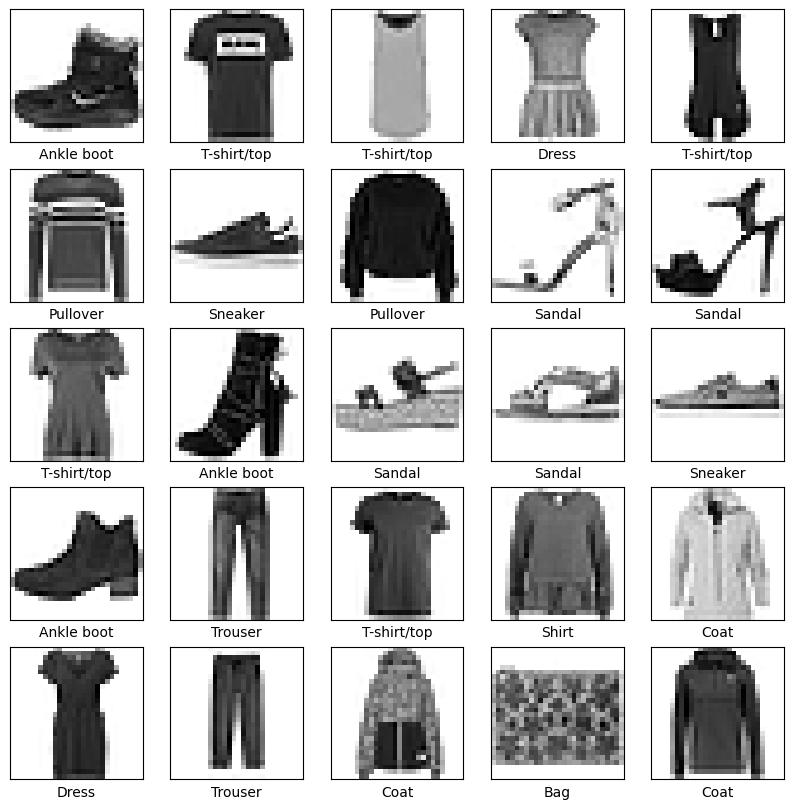

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

train_sizes = [5000, 10000, 20000]
test_size = 1000

for size in train_sizes:
    print(f"Training size: {size}")

    X_train_sub, _, y_train_sub, _ = train_test_split(train_images, train_labels, train_size=size, random_state=42)
    X_test_sub, _, y_test_sub, _ = train_test_split(test_images, test_labels, train_size=test_size, random_state=42)

    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    sgd = SGDClassifier()

    knn.fit(X_train_sub, y_train_sub)
    dt.fit(X_train_sub, y_train_sub)
    sgd.fit(X_train_sub, y_train_sub)

    knn_pred = knn.predict(X_test_sub)
    dt_pred = dt.predict(X_test_sub)
    sgd_pred = sgd.predict(X_test_sub)

    knn_acc = accuracy_score(y_test_sub, knn_pred)
    dt_acc = accuracy_score(y_test_sub, dt_pred)
    sgd_acc = accuracy_score(y_test_sub, sgd_pred)

    print(f"KNN Accuracy: {knn_acc:.2f}")
    print(f"DT Accuracy: {dt_acc:.2f}")
    print(f"SGD Accuracy: {sgd_acc:.2f}")
    print("-------------------------------")


Training size: 5000
KNN Accuracy: 0.79
DT Accuracy: 0.73
SGD Accuracy: 0.77
-------------------------------
Training size: 10000
KNN Accuracy: 0.81
DT Accuracy: 0.74
SGD Accuracy: 0.80
-------------------------------
Training size: 20000
KNN Accuracy: 0.82
DT Accuracy: 0.78
SGD Accuracy: 0.78
-------------------------------


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

Classifier: KNN
Accuracy: 0.82
Precision: 0.82
Recall: 0.81
F1-Score: 0.81


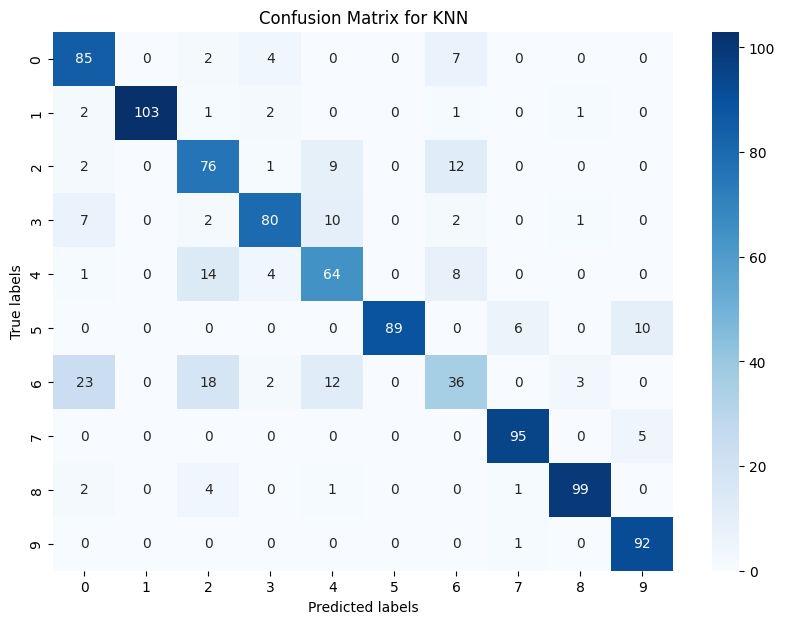

-------------------------------
Classifier: DT
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.78


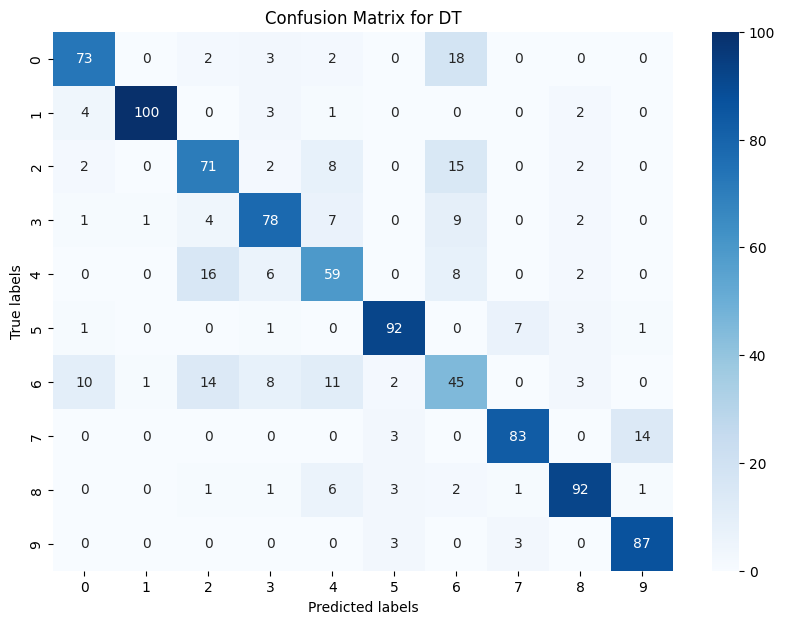

-------------------------------
Classifier: SGD
Accuracy: 0.78
Precision: 0.81
Recall: 0.77
F1-Score: 0.76


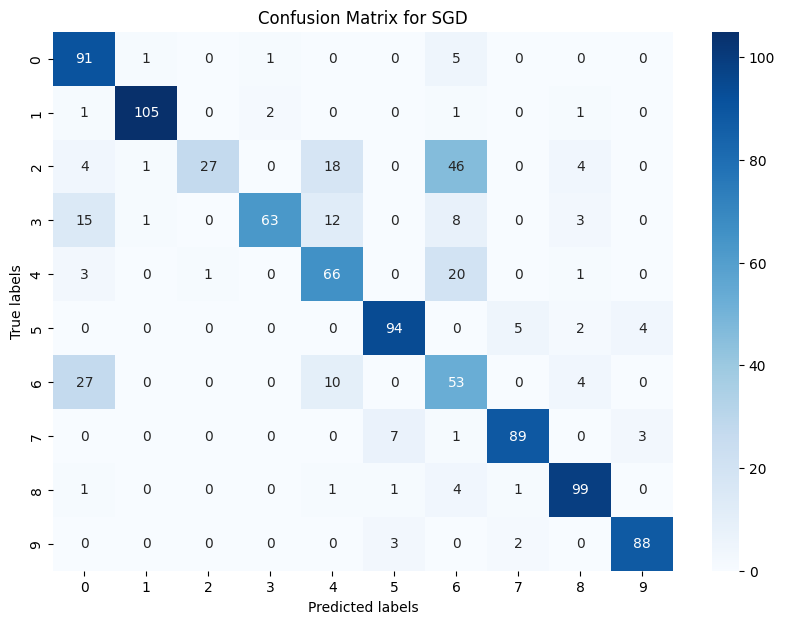

-------------------------------


In [14]:
import matplotlib.pyplot as plt

results = {
    'KNN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'confusion_matrix': []},
    'DT': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'confusion_matrix': []},
    'SGD': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'confusion_matrix': []}
}

predictions_dict = {
    'KNN': knn_pred,
    'DT': dt_pred,
    'SGD': sgd_pred
}

for name, preds in predictions_dict.items():
    results[name]['accuracy'].append(accuracy_score(y_test_sub, preds))
    results[name]['precision'].append(precision_score(y_test_sub, preds, average='macro'))
    results[name]['recall'].append(recall_score(y_test_sub, preds, average='macro'))
    results[name]['f1'].append(f1_score(y_test_sub, preds, average='macro'))
    results[name]['confusion_matrix'].append(confusion_matrix(y_test_sub, preds))

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['accuracy'][0]:.2f}")
    print(f"Precision: {metrics['precision'][0]:.2f}")
    print(f"Recall: {metrics['recall'][0]:.2f}")
    print(f"F1-Score: {metrics['f1'][0]:.2f}")
    plt.figure(figsize=(10, 7))
    sns.heatmap(metrics['confusion_matrix'][0], annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    print("-------------------------------")


K-Nearest Neighbors (KNN)

Accuracy: 82%
Paper Benchmark: 95.9% (best model)
Decision Tree (DT)

Accuracy: 78%
Paper Benchmark:87.3% (best model)
Stochastic Gradient Descent (SGD)

Accuracy: 78%
Paper Benchmark:91.4% (best model)

Results are lower than the best models. Differences may arise from dataset size, hyperparameter tuning and ensemble techniques used in the paper.